In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower

In [336]:
fifa_df = pd.read_csv('data 2.csv')


In [337]:
fifa_df = fifa_df.drop(['Photo', 'Flag', 'Club Logo'], axis =1)

In [338]:
fifa_df.head()


,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [339]:
fifa_df['Nationality'].value_counts().head()


England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

In [340]:
weight = fifa_df['Weight'].dropna()

In [341]:
speed = fifa_df['SprintSpeed'].dropna()

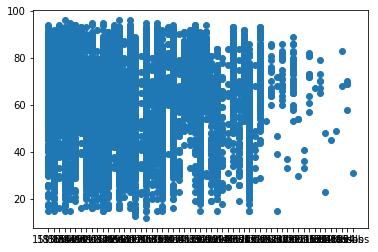

In [342]:
plt.scatter(weight,speed)

# Data Cleaning

In [343]:
overall_df= fifa_df[['Overall', 'Nationality']].dropna()
overall.head()

,Overall,Nationality
0,94,Argentina
1,94,Portugal
2,92,Brazil
3,91,Spain
4,91,Belgium


In [344]:
finishing_df = fifa_df[['Finishing', 'Nationality']].dropna()
finishing_df.head()

,Finishing,Nationality
0,95.0,Argentina
1,94.0,Portugal
2,87.0,Brazil
3,13.0,Spain
4,82.0,Belgium


In [345]:
overall_eng = overall_df[overall_df['Nationality'].str.contains("England")==True]
overall_spa = overall_df[overall_df['Nationality'].str.contains("Spain")==True]

In [346]:
finish_eng = finishing_df[finishing_df['Nationality'].str.contains("England")==True]
finish_spa = finishing_df[finishing_df['Nationality'].str.contains("Spain")==True]

In [347]:
english_ov_df = overall_eng['Overall']
english_overall = np.array(english_ov_df)
print(len(english_overall))

#Spanish 

spanish_ov_df = overall_spa['Overall']
spanish_overall = np.array(spanish_ov_df)
print(len(spanish_overall))

1662
1072


# TEST 1: English vs Spanish
## Which country produces better players?

In [348]:
type(english_overall)

numpy.ndarray

(array([ 45., 109., 244., 438., 427., 211., 123.,  50.,  13.,   2.]),
 array([46. , 50.3, 54.6, 58.9, 63.2, 67.5, 71.8, 76.1, 80.4, 84.7, 89. ]),
 <a list of 10 Patch objects>)

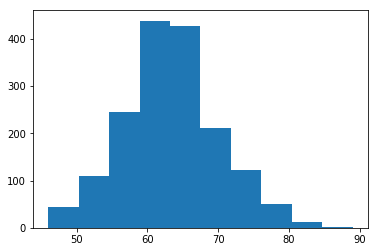

In [349]:
plt.hist(english_overall)

In [350]:
type(spanish_overall)

numpy.ndarray

(array([  1.,  23., 117., 220., 258., 193., 146.,  79.,  28.,   7.]),
 array([51., 55., 59., 63., 67., 71., 75., 79., 83., 87., 91.]),
 <a list of 10 Patch objects>)

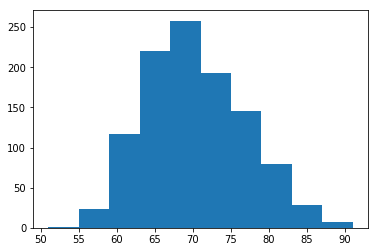

In [351]:
plt.hist(spanish_overall)

In [352]:
def calc_cohen_d(group1, group2):
    """Every function starts with a verb! and never capitalize k thx bye"""

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [331]:
cohens_d = calc_cohen_d(english_overall, spanish_overall)

mean_diff = np.mean(english_overall) - np.mean(spanish_overall)
mean_diff

-6.2690911417641

In [323]:
# Initialize parameters
effect = cohens_d
alpha = 0.05
power = 1
# sample 2 / sample 1   
ratio = len(spanish_overall) / len(english_overall)
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None,ratio=ratio, alpha=alpha)
print(f"The minimum sample size: {result}")
print(f"Number of players:{len(spanish_overall)}")

The minimum sample size: 500.0
Number of players:1072


In [324]:
sample_means_overall_eng = []
for _ in range(1000):
    sample_mean = np.random.choice(english_overall,size=500).mean()
    sample_means_overall_eng.append(sample_mean)
len(sample_means_overall_eng)

sample_means_overall_spanish = []
for _ in range(1000):
    sample_mean = np.random.choice(spanish_overall,size=500).mean()
    sample_means_overall_spanish.append(sample_mean)
len(sample_means_overall_spanish)

1000

In [325]:
def calc_variance(sample):
    '''Computes the variance a list of values'''
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def calc_sample_variance(sample1, sample2):
    '''Computes the pooled variance 2 lists of values, using the calc_variance function'''
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = calc_variance(sample1), calc_variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)

def calc_twosample_tstatistic(expr, ctrl):
    '''Computes the 2-sample T-stat of 2 lists of values, using the calc_sample_variance function'''
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = calc_sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t


In [326]:
t_stat = calc_twosample_tstatistic(sample_means_overall_eng, sample_means_overall_spanish)

t_stat

-480.6580710651087

In [329]:
stats.ttest_ind(sample_means_overall_eng, sample_means_overall_spanish)


Ttest_indResult(statistic=-480.6580710651088, pvalue=0.0)